In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
#firstly, I import all the libraries what I need 

In [4]:
# "ButterworthLowpassFilter"function first shifts the image to the center using the fftshift function.
# and then creates a Butterworth low-pass filter with the same size as the input image.
# The filter is created using a nested loop that iterates over all frequency points in the filter.
# Each frequency point, the distance from the center of the filter is calculated.
# The filter value at the frequency point is then calculated using the Butterworth low-pass filter formula.
# Finally, the function applies the filter to the input image by multiplying the filter with the image 
# in the frequency domain inverse Fourier transforming the result using ifft2 and ifftshift functions.
def butterworthLowpassFilter(img, D0, n):
    h, w = img.shape
    img_shifted = np.fft.fftshift(np.fft.fft2(img))
    H = np.zeros((h, w))
    for u in range(h):
        for v in range(w):
            Distance = np.sqrt((u - h//2)**2 + (v - w//2)**2)
            H[u, v] = 1 / (1 + (Distance / D0)**(2*n))
    filtered_shifted = H * img_shifted
    filtered = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_shifted)))

    return filtered

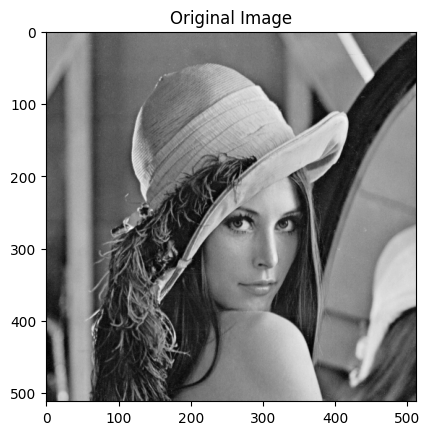

In [5]:
#read the original image image and show it
img = cv2.imread("Lenna.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

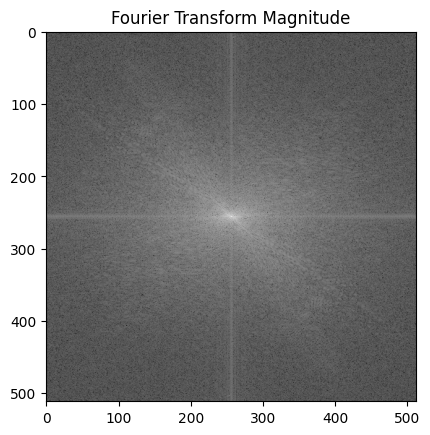

In [6]:

F = np.fft.fft2(img)
F_magnitude = np.abs(np.fft.fftshift(F))
plt.imshow(np.log(1 + F_magnitude), cmap='gray')
plt.title('Fourier Transform Magnitude')
plt.show()

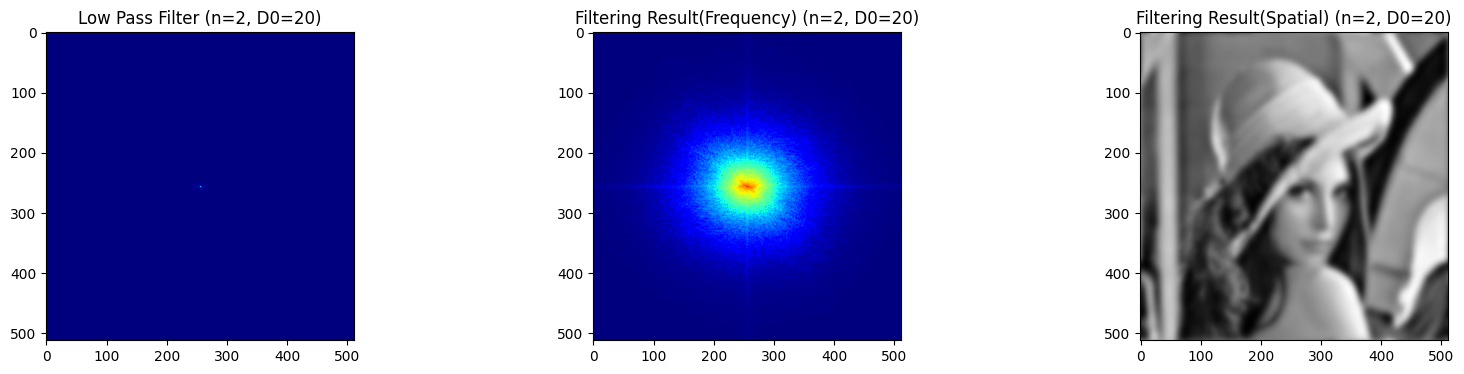

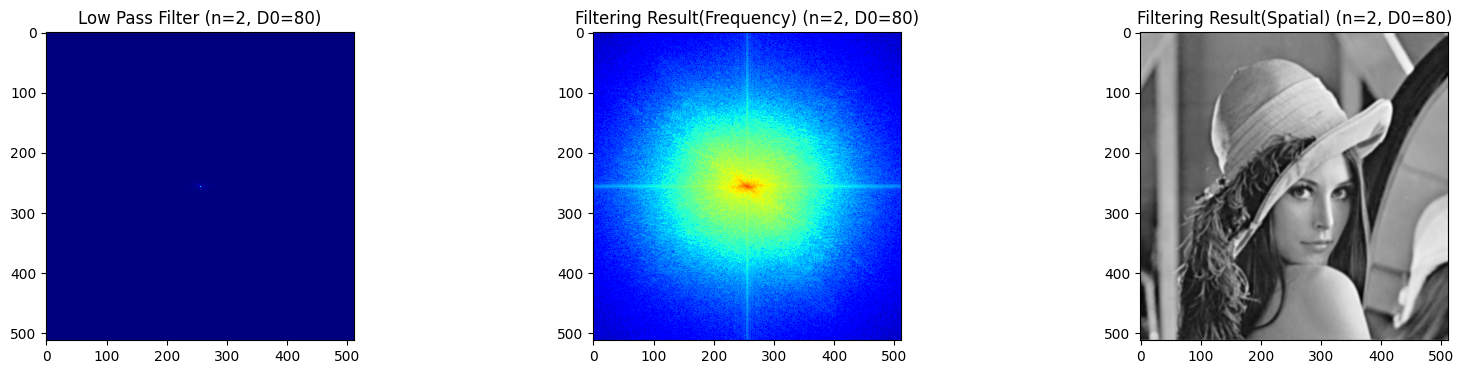

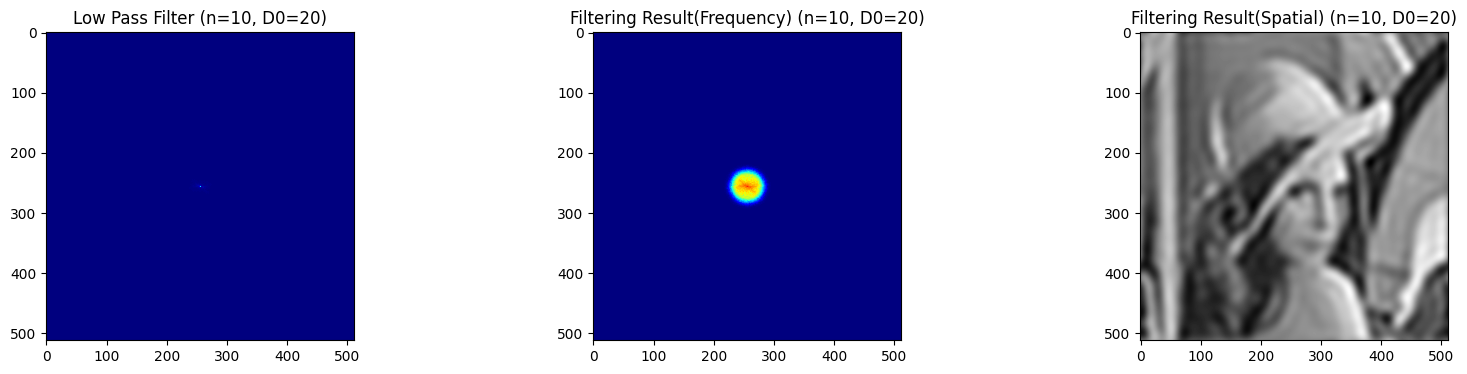

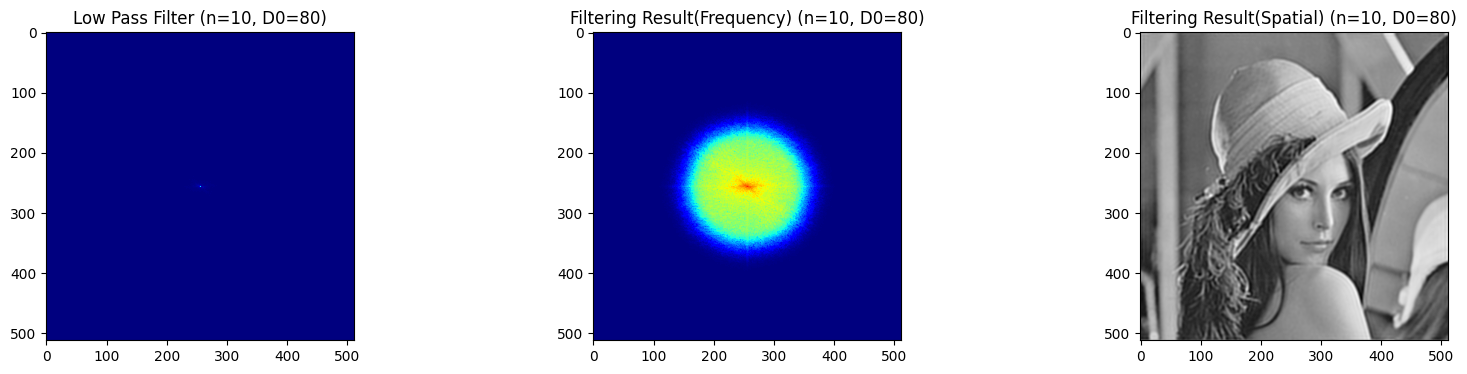

In [7]:

# This code use for-loops over a range of n and D0 values using zip function to create combinations of these values.I choose random values 
# For each combination, the code applies the Butterworth low-pass filter using the butterworthLowpassFilter function and displays the filter,
n_values = [2,10]
D0_values = [20,80]
for n in n_values:
     for D0 in  D0_values:
        filtered = butterworthLowpassFilter(img, D0, n)
        filtered_shifted = np.fft.fftshift(np.fft.fft2(filtered))
        H_magnitude = np.abs(filtered_shifted)
        # show the result
        plt.figure(figsize=(20, 4))
        plt.subplot(131)
        plt.imshow(H_magnitude, cmap='jet')
        plt.title(f'Low Pass Filter (n={n}, D0={D0})')
        plt.subplot(132)
        plt.imshow(np.log(1 + H_magnitude), cmap='jet')
        plt.title(f'Filtering Result(Frequency) (n={n}, D0={D0})')
        plt.subplot(133)
        plt.imshow(filtered, cmap='gray')
        plt.title(f'Filtering Result(Spatial) (n={n}, D0={D0})')
        plt.show()

In [8]:
#part2b
#firstly, I import all the libraries what I need same as part2a
import cv2
import numpy as np
import matplotlib.pyplot as plt

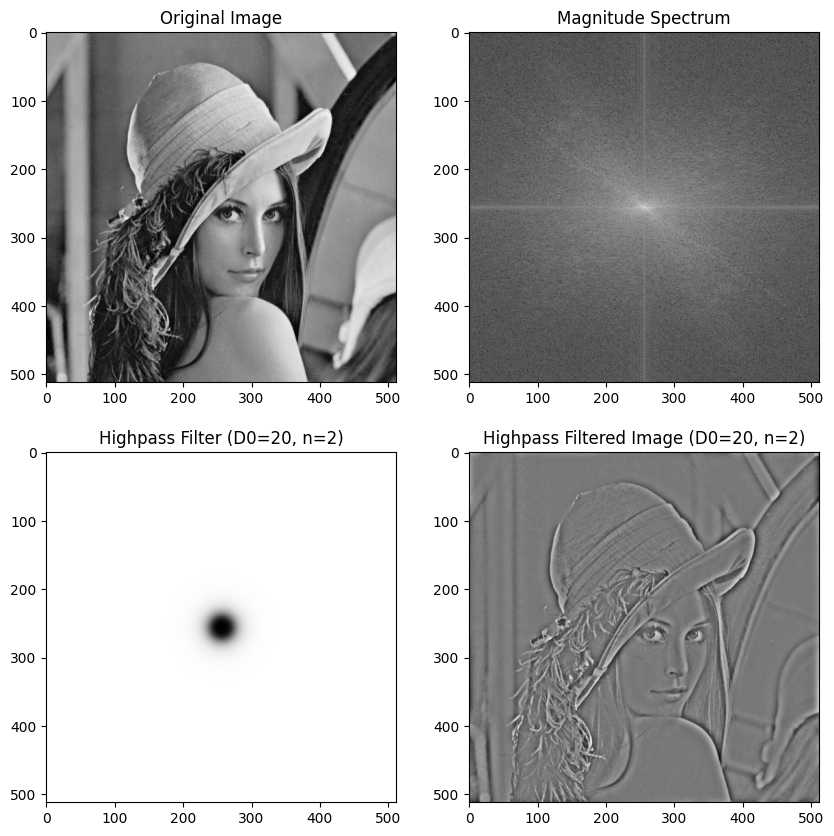

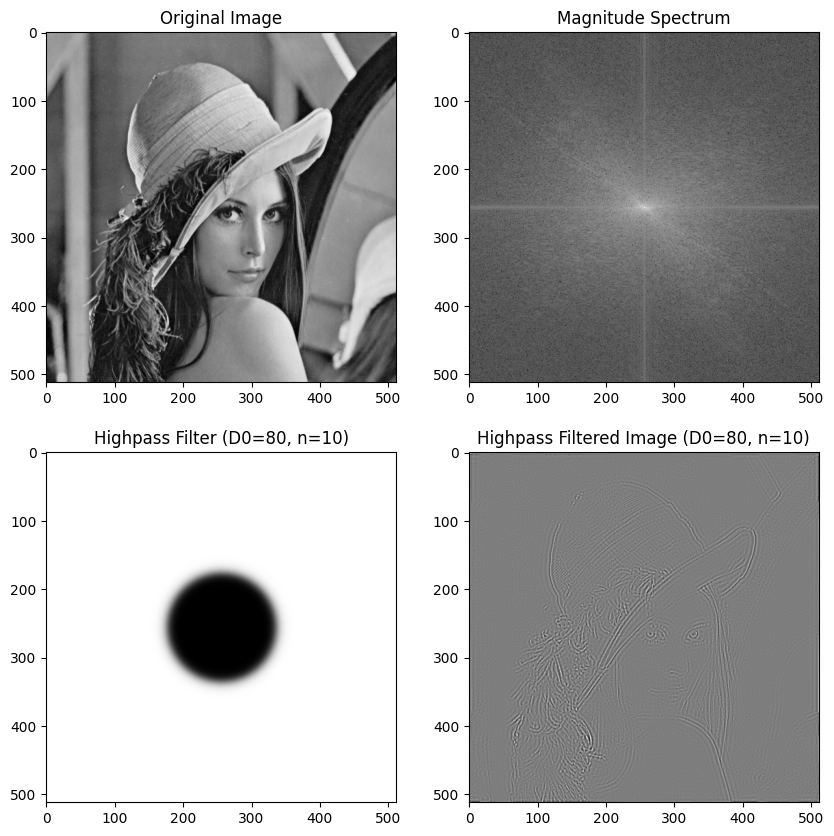

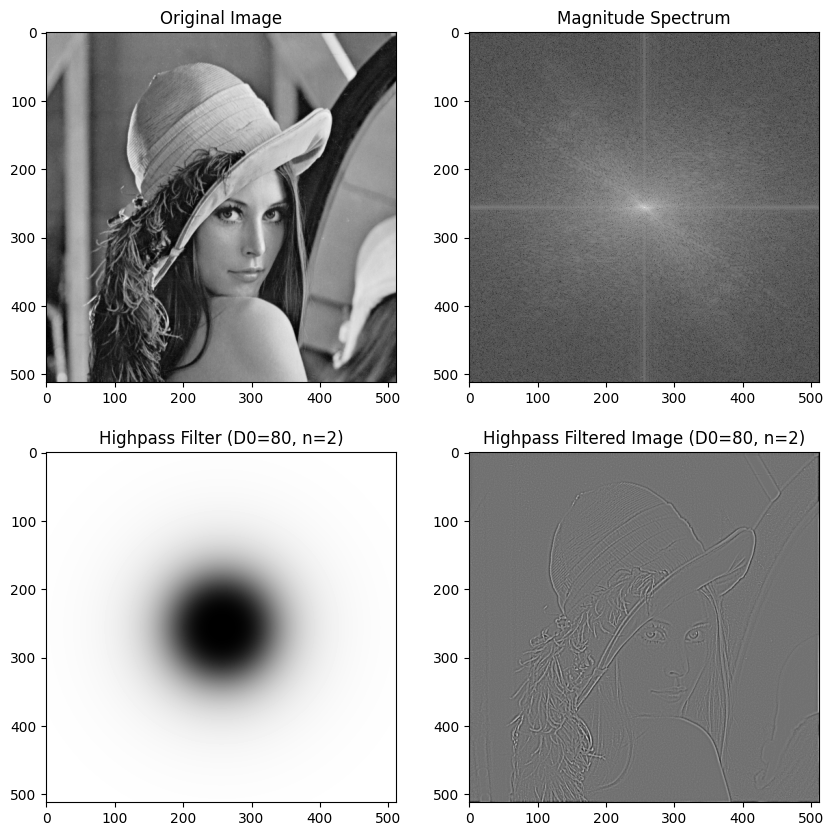

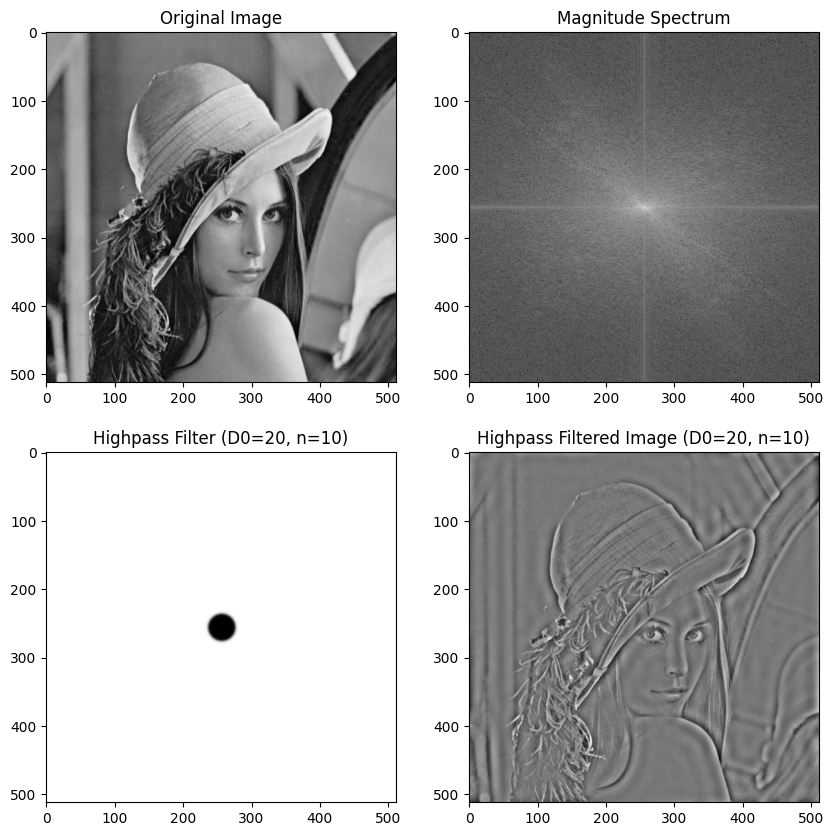

In [9]:
def butterworthHighpassFilter(img, D0, n):
    # 𝐻𝑖𝑔ℎ𝑃𝑎𝑠𝑠=1−𝐿𝑜𝑤𝑃𝑎𝑠 therfore most of the method is same as Low Pass filter.
    # This function apply Butterworth highpass filter on a grayscale image.It takes three parameters: image, D0 , and n .
    # The function performs the filtering and show the original results 

    img_fft = np.fft.fft2(img)
    img_fft_shift = np.fft.fftshift(img_fft)
    rows, cols = img.shape
    center = (rows/2, cols/2)
    H_highpass = np.zeros(img.shape, dtype=np.float32)
    for h in range(rows):
        for w in range(cols):
            dist = np.sqrt((h - center[0])**2 + (w - center[1])**2)
            H_highpass[h,w] = 1 - (1 / (1 + (dist/D0)**(2*n)))
    img_fft_shift_highpass = img_fft_shift * H_highpass
    img_highpass = np.fft.ifft2(np.fft.ifftshift(img_fft_shift_highpass)).real
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    ax[0, 0].imshow(img, cmap='gray')
    ax[0, 0].set_title('Original Image')
    ax[0, 1].imshow(np.log(1 + np.abs(img_fft_shift)), cmap='gray')
    ax[0, 1].set_title('Magnitude Spectrum')
    ax[1, 0].imshow(H_highpass, cmap='gray')
    ax[1, 0].set_title(f'Highpass Filter (D0={D0}, n={n})')
    ax[1, 1].imshow(img_highpass, cmap='gray')
    ax[1, 1].set_title(f'Highpass Filtered Image (D0={D0}, n={n})')
    plt.show()
    return img_highpass
img = cv2.imread("Lenna.png", cv2.IMREAD_GRAYSCALE)
img_filtered=butterworthHighpassFilter(img, 20, 2)
img_filtered1=butterworthHighpassFilter(img, 80, 10)
img_filtered2=butterworthHighpassFilter(img, 80, 2)
img_filtered3=butterworthHighpassFilter(img, 20, 10)
